# Analysis of North Carolina's Rate of Bullet Ballots 
### (Ballots that only have a vote for US PRESIDENT, others empty). 
This analysis compares the amount of US President's votes to the amount of US House of Representatives's Votes per Precinct in North Carolina.

The data in this analysis has been taken from this source, but is also included in this repository:

    https://s3.amazonaws.com/dl.ncsbe.gov/ENRS/2024_11_05/results_pct_20241105.zip

In [1]:
import pandas as pd

from us_election_2024.helpers import read_data, unique, filter_for, total_votes_per_precinct, filter_isin, filter_multiindex_by_tuples, contains

## Load election data

In [2]:
df = read_data()
df

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,Early Voting,Absentee by Mail,Provisional,Total Votes,Real Precinct,Unnamed: 15
0,CALDWELL,11/05/2024,1,1155,S,NC DISTRICT COURT JUDGE DISTRICT 36 SEAT 09,Richard S. Holloway,REP,1,580,0,0,0,580,Y,NaN
1,CALDWELL,11/05/2024,1,1347,S,NC STATE SENATE DISTRICT 45,Kim Bost,DEM,1,173,0,0,0,173,Y,NaN
2,CALDWELL,11/05/2024,1,1393,S,US PRESIDENT,Jill Stein,GRE,1,0,0,0,0,0,Y,NaN
3,CALDWELL,11/05/2024,10,2,C,CALDWELL COUNTY BOARD OF EDUCATION,Michael Barrick,LIB,3,102,0,0,0,102,Y,NaN
4,CALDWELL,11/05/2024,10,4,C,CALDWELL SOIL AND WATER CONSERVATION DISTRICT ...,David Bruner,,1,158,0,0,0,158,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230487,WILKES,11/05/2024,104,1005,S,NC ATTORNEY GENERAL,Jeff Jackson,DEM,1,82,0,0,0,82,Y,NaN
230488,WILKES,11/05/2024,104,1302,S,NC SECRETARY OF STATE,Chad Brown,REP,1,260,0,0,0,260,Y,NaN
230489,WILKES,11/05/2024,104,1338,S,NC STATE SENATE DISTRICT 36,Darren Staley,DEM,1,85,0,0,0,85,Y,NaN
230490,WILKES,11/05/2024,104,1338,S,NC STATE SENATE DISTRICT 36,Eddie Settle,REP,1,270,0,0,0,270,Y,NaN


# Extract House of Representatives data
Sum up total amount of votes for house of representatives per precinct in North Carolina.

In [3]:
df_house = contains(df, "Contest Name", "US HOUSE OF REPRESENTATIVES")
df_house = df_house.groupby(["County", "Precinct"])[["Early Voting", "Absentee by Mail", "Total Votes"]].sum()
df_house

Early Voting  Absentee by Mail  Total Votes
County   Precinct                                             
ALAMANCE 01                1783               158         2975
         02                2150               146         3141
         035               2864               142         3573
         03C               1479               153         2019
         03N               2015               157         2564
...                         ...               ...          ...
YANCEY   07 BRU             227                18          352
         08 CRA            1429                71         1954
         09 SOU            1137               101         1573
         10 PEN             255                50          443
         11 PRI             751                65         1000

[2908 rows x 3 columns]

# Extract Presidential Election data
Sum up total presidential votes per precinct.

In [4]:
df_pres = contains(df, "Contest Name", "US PRESIDENT")
df_pres = df_pres.groupby(["County", "Precinct"])[["Early Voting", "Absentee by Mail", "Total Votes"]].sum()
df_pres

Early Voting  Absentee by Mail  Total Votes
County   Precinct                                             
ALAMANCE 01                1814               162         3037
         02                2201               150         3228
         035               2920               151         3665
         03C               1491               158         2049
         03N               2057               162         2624
...                         ...               ...          ...
YANCEY   07 BRU             235                18          361
         08 CRA            1441                74         1982
         09 SOU            1145               103         1588
         10 PEN             259                50          451
         11 PRI             764                67         1016

[2908 rows x 3 columns]

# Merge presidential and house election data per precinct

In [5]:
total = pd.merge(df_house, df_pres, left_index=True, right_index=True, suffixes=[" House", " President"])
total

Early Voting House  Absentee by Mail House  \
County   Precinct                                               
ALAMANCE 01                      1783                     158   
         02                      2150                     146   
         035                     2864                     142   
         03C                     1479                     153   
         03N                     2015                     157   
...                               ...                     ...   
YANCEY   07 BRU                   227                      18   
         08 CRA                  1429                      71   
         09 SOU                  1137                     101   
         10 PEN                   255                      50   
         11 PRI                   751                      65   

                   Total Votes House  Early Voting President  \
County   Precinct                                              
ALAMANCE 01                     2975                    1814   
         02                     3141                    2201   
         035                    3573                    2920   
         03C                    2019                    1491   
         03N                    2564                    2057   
...                              ...                     ...   
YANCEY   07 BRU                  352                     235   
         08 CRA                 1954                    1441   
         09 SOU                 1573                    1145   
         10 PEN                  443                     259   
         11 PRI                 1000                     764   

                   Absentee by Mail President  Total Votes President  
County   Precinct                                                     
ALAMANCE 01                               162                   3037  
         02                               150                   3228  
         035                              151                   3665  
         03C                              158                   2049  
         03N                              162                   2624  
...                                       ...                    ...  
YANCEY   07 BRU                            18                    361  
         08 CRA                            74                   1982  
         09 SOU                           103                   1588  
         10 PEN                            50                    451  
         11 PRI                            67                   1016  

[2908 rows x 6 columns]

# Calculate the difference in presidential and house votes

In [6]:
total["Difference"] = total["Total Votes President"] - total["Total Votes House"]
total

Early Voting House  Absentee by Mail House  \
County   Precinct                                               
ALAMANCE 01                      1783                     158   
         02                      2150                     146   
         035                     2864                     142   
         03C                     1479                     153   
         03N                     2015                     157   
...                               ...                     ...   
YANCEY   07 BRU                   227                      18   
         08 CRA                  1429                      71   
         09 SOU                  1137                     101   
         10 PEN                   255                      50   
         11 PRI                   751                      65   

                   Total Votes House  Early Voting President  \
County   Precinct                                              
ALAMANCE 01                     2975                    1814   
         02                     3141                    2201   
         035                    3573                    2920   
         03C                    2019                    1491   
         03N                    2564                    2057   
...                              ...                     ...   
YANCEY   07 BRU                  352                     235   
         08 CRA                 1954                    1441   
         09 SOU                 1573                    1145   
         10 PEN                  443                     259   
         11 PRI                 1000                     764   

                   Absentee by Mail President  Total Votes President  \
County   Precinct                                                      
ALAMANCE 01                               162                   3037   
         02                               150                   3228   
         035                              151                   3665   
         03C                              158                   2049   
         03N                              162                   2624   
...                                       ...                    ...   
YANCEY   07 BRU                            18                    361   
         08 CRA                            74                   1982   
         09 SOU                           103                   1588   
         10 PEN                            50                    451   
         11 PRI                            67                   1016   

                   Difference  
County   Precinct              
ALAMANCE 01                62  
         02                87  
         035               92  
         03C               30  
         03N               60  
...                       ...  
YANCEY   07 BRU             9  
         08 CRA            28  
         09 SOU            15  
         10 PEN             8  
         11 PRI            16  

[2908 rows x 7 columns]

# Calculate the rate of bullet ballots

In [7]:
total["Bullet Ballots %"] = 100.0 * total.Difference / total["Total Votes President"]
total 

Early Voting House  Absentee by Mail House  \
County   Precinct                                               
ALAMANCE 01                      1783                     158   
         02                      2150                     146   
         035                     2864                     142   
         03C                     1479                     153   
         03N                     2015                     157   
...                               ...                     ...   
YANCEY   07 BRU                   227                      18   
         08 CRA                  1429                      71   
         09 SOU                  1137                     101   
         10 PEN                   255                      50   
         11 PRI                   751                      65   

                   Total Votes House  Early Voting President  \
County   Precinct                                              
ALAMANCE 01                     2975                    1814   
         02                     3141                    2201   
         035                    3573                    2920   
         03C                    2019                    1491   
         03N                    2564                    2057   
...                              ...                     ...   
YANCEY   07 BRU                  352                     235   
         08 CRA                 1954                    1441   
         09 SOU                 1573                    1145   
         10 PEN                  443                     259   
         11 PRI                 1000                     764   

                   Absentee by Mail President  Total Votes President  \
County   Precinct                                                      
ALAMANCE 01                               162                   3037   
         02                               150                   3228   
         035                              151                   3665   
         03C                              158                   2049   
         03N                              162                   2624   
...                                       ...                    ...   
YANCEY   07 BRU                            18                    361   
         08 CRA                            74                   1982   
         09 SOU                           103                   1588   
         10 PEN                            50                    451   
         11 PRI                            67                   1016   

                   Difference  Bullet Ballots %  
County   Precinct                                
ALAMANCE 01                62          2.041488  
         02                87          2.695167  
         035               92          2.510232  
         03C               30          1.464129  
         03N               60          2.286585  
...                       ...               ...  
YANCEY   07 BRU             9          2.493075  
         08 CRA            28          1.412714  
         09 SOU            15          0.944584  
         10 PEN             8          1.773836  
         11 PRI            16          1.574803  

[2908 rows x 8 columns]

# Get rid of precincts with zero votes

In [8]:
total = total[total["Total Votes President"] != 0]
total

Early Voting House  Absentee by Mail House  \
County   Precinct                                               
ALAMANCE 01                      1783                     158   
         02                      2150                     146   
         035                     2864                     142   
         03C                     1479                     153   
         03N                     2015                     157   
...                               ...                     ...   
YANCEY   07 BRU                   227                      18   
         08 CRA                  1429                      71   
         09 SOU                  1137                     101   
         10 PEN                   255                      50   
         11 PRI                   751                      65   

                   Total Votes House  Early Voting President  \
County   Precinct                                              
ALAMANCE 01                     2975                    1814   
         02                     3141                    2201   
         035                    3573                    2920   
         03C                    2019                    1491   
         03N                    2564                    2057   
...                              ...                     ...   
YANCEY   07 BRU                  352                     235   
         08 CRA                 1954                    1441   
         09 SOU                 1573                    1145   
         10 PEN                  443                     259   
         11 PRI                 1000                     764   

                   Absentee by Mail President  Total Votes President  \
County   Precinct                                                      
ALAMANCE 01                               162                   3037   
         02                               150                   3228   
         035                              151                   3665   
         03C                              158                   2049   
         03N                              162                   2624   
...                                       ...                    ...   
YANCEY   07 BRU                            18                    361   
         08 CRA                            74                   1982   
         09 SOU                           103                   1588   
         10 PEN                            50                    451   
         11 PRI                            67                   1016   

                   Difference  Bullet Ballots %  
County   Precinct                                
ALAMANCE 01                62          2.041488  
         02                87          2.695167  
         035               92          2.510232  
         03C               30          1.464129  
         03N               60          2.286585  
...                       ...               ...  
YANCEY   07 BRU             9          2.493075  
         08 CRA            28          1.412714  
         09 SOU            15          0.944584  
         10 PEN             8          1.773836  
         11 PRI            16          1.574803  

[2861 rows x 8 columns]

# Sort data for biggest rate of bullet ballots

In [9]:
total.sort_values("Bullet Ballots %", ascending=False)

,,Early Voting House,Absentee by Mail House,Total Votes House,Early Voting President,Absentee by Mail President,Total Votes President,Difference,Bullet Ballots %
County,Precinct,,,,,,,,
PITT,1501,0,0,49,0,0,103,54,52.427184
SAMPSON,CLCE,211,5,288,429,9,563,275,48.845471
PITT,EV EPPES,4335,0,4335,7773,0,7773,3438,44.230027
ONSLOW,NR02,311,43,522,568,81,904,382,42.256637
PITT,1505B,0,0,218,0,0,367,149,40.599455
...,...,...,...,...,...,...,...,...,...
GUILFORD,G18,0,0,228,0,0,226,-2,-0.884956
WAKE,01-29,0,0,553,0,0,546,-7,-1.282051
WASHINGTON,P2,0,0,219,0,0,216,-3,-1.388889


# Check if the total numbers make sense

In [10]:
state = total.sum().astype(int)
state

Early Voting House            4059011
Absentee by Mail House         278703
Total Votes House             5482174
Early Voting President        4209088
Absentee by Mail President     295145
Total Votes President         5697901
Difference                     215727
Bullet Ballots %                11717
dtype: int64

Total House Votes are 5,482,174 and Presidential Votes 5,697,901 which comes close to the total ballots cast of 5,724,001.

Checking overall rate of bullet ballots:

In [11]:
print(100.0 * (state["Total Votes President"] - state["Total Votes House"]) / state["Total Votes President"], "%")

3.7860784172978788 %


# Plot distribution of bullet ballots

<Axes: xlabel='County,Precinct', ylabel='Bullet Ballot Rate in %'>

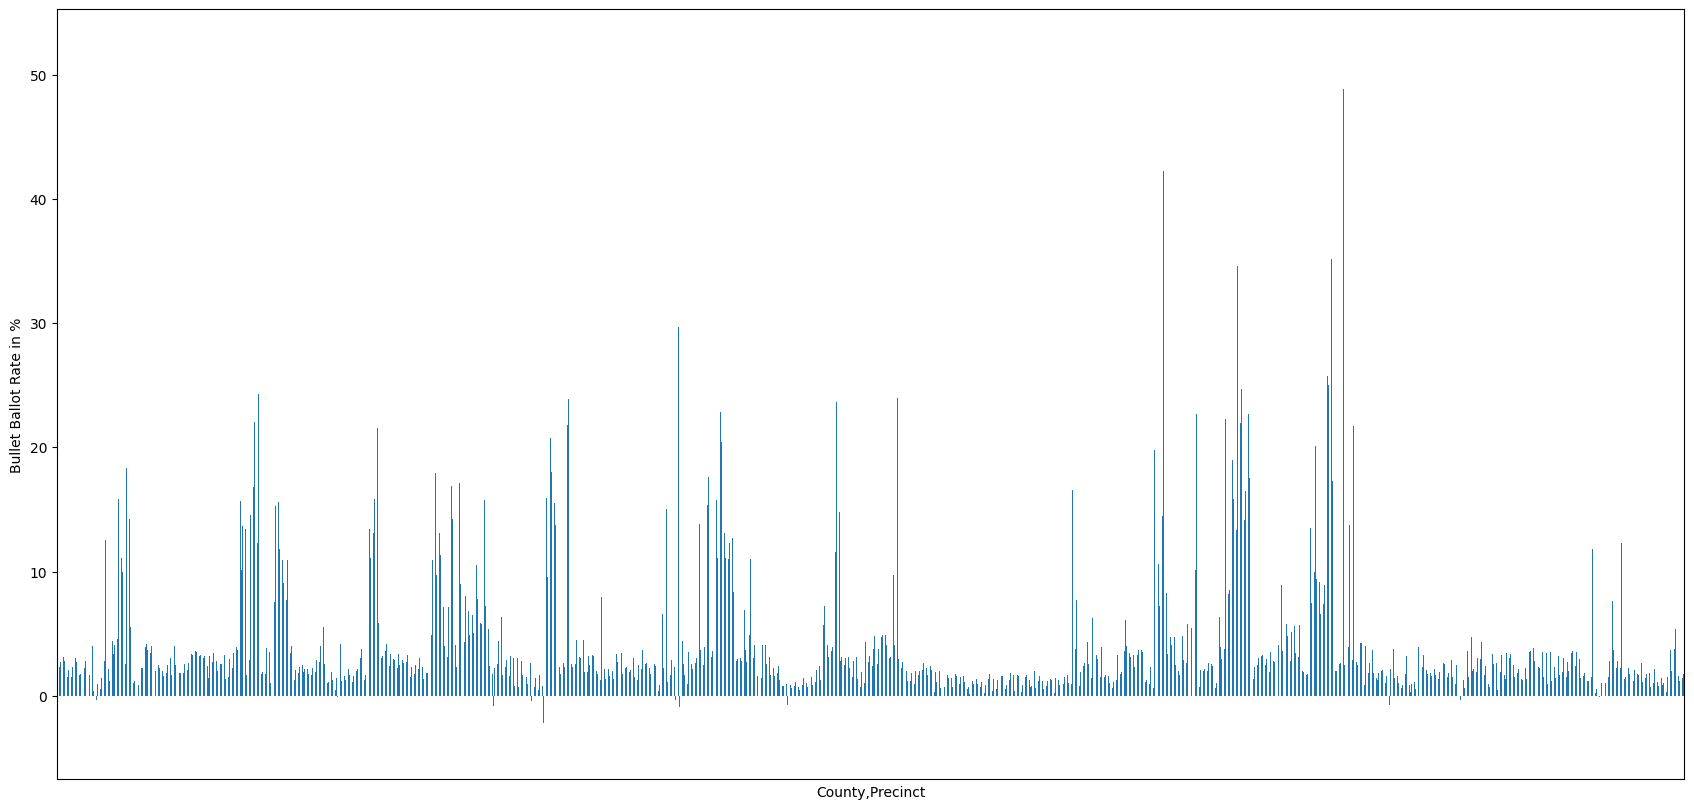

In [12]:
total["Bullet Ballots %"].plot.bar(figsize=(21, 10), xticks=[], ylabel="Bullet Ballot Rate in %")

# Compare mean and median rate of bullet ballots

In [13]:
total.mean()["Bullet Ballots %"]

np.float64(4.095477297936297)

In [14]:
total.median()["Bullet Ballots %"]

np.float64(2.3222060957910013)

# Plot sorted bullet ballot rates

<Axes: xlabel='County,Precinct', ylabel='Bullet Ballot Rate in %'>

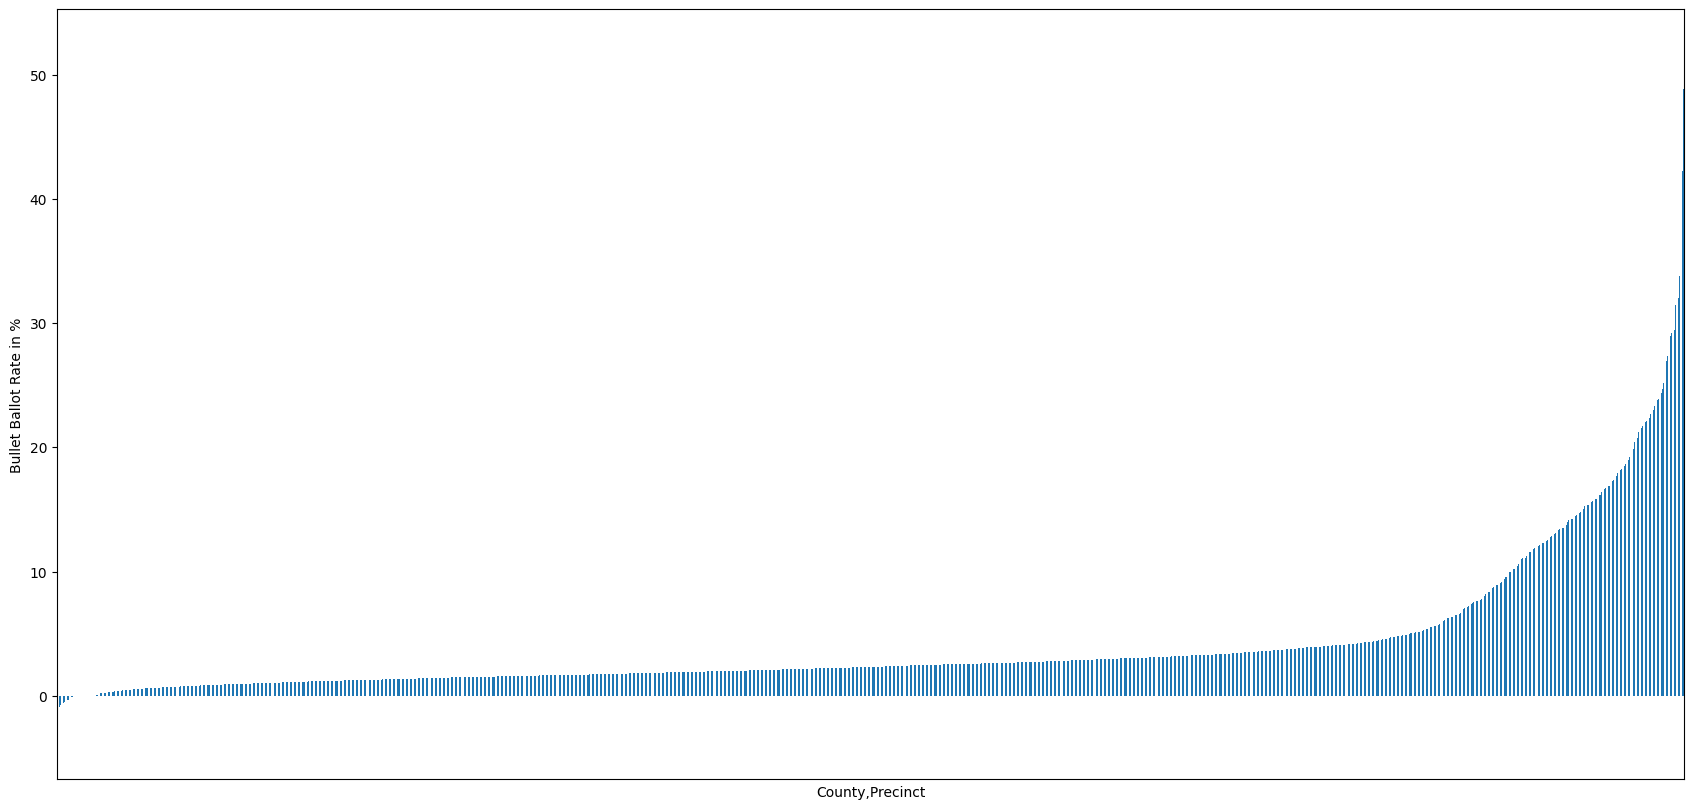

In [15]:
total.sort_values("Bullet Ballots %")["Bullet Ballots %"].plot.bar(figsize=(21,10), xticks=[], ylabel="Bullet Ballot Rate in %")

# Zoom into the 50 highest bullet ballot rates

<Axes: xlabel='County,Precinct', ylabel='Bullet Ballot Rate in %'>

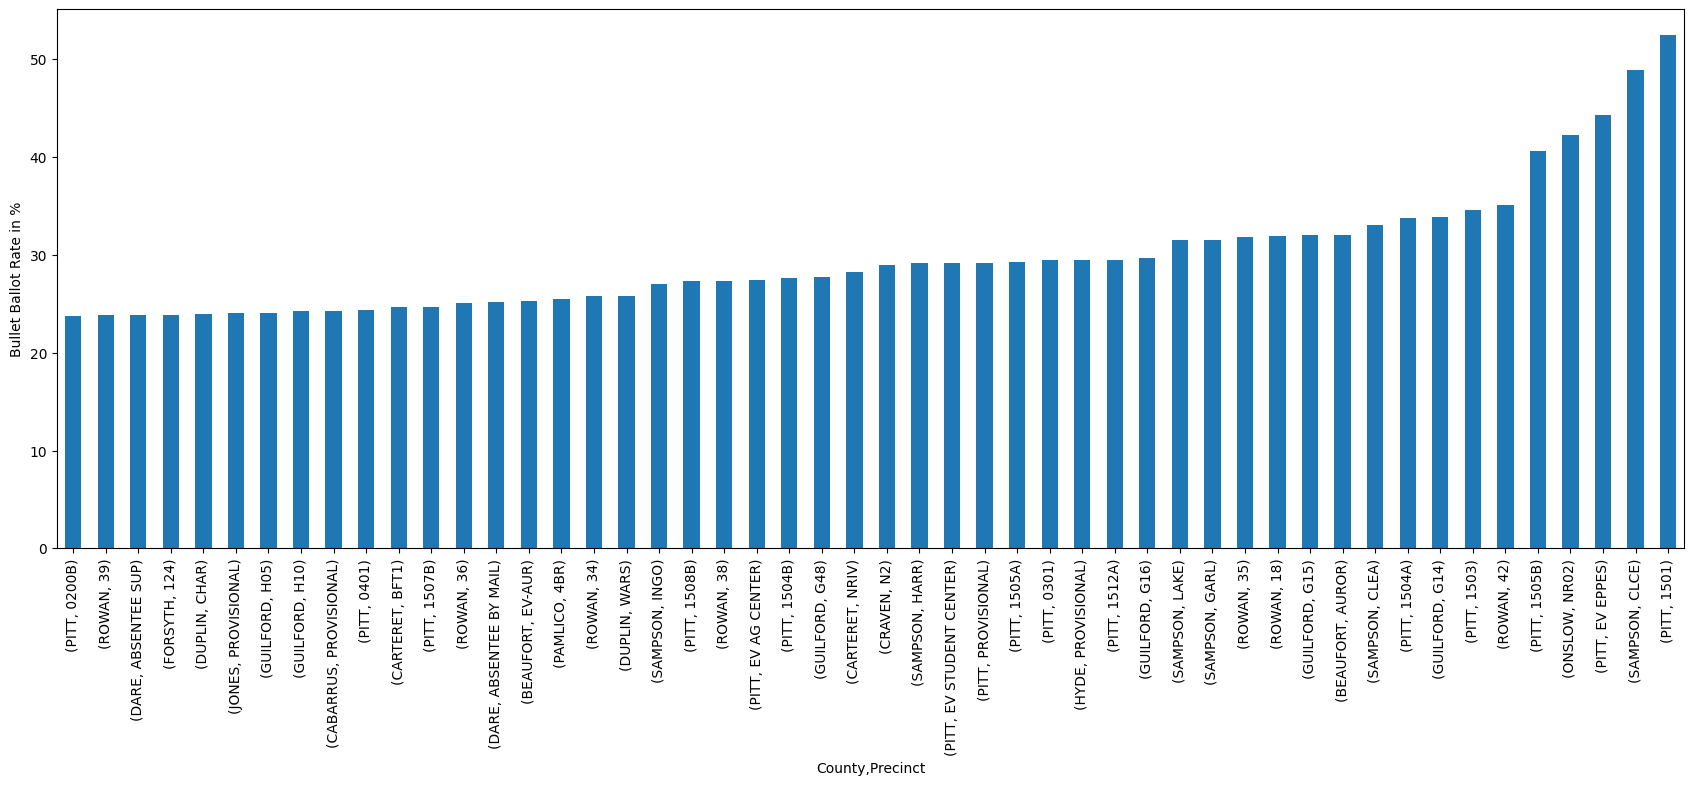

In [16]:
total.sort_values("Bullet Ballots %")["Bullet Ballots %"].iloc[-50:].plot.bar(figsize=(21, 7), ylabel="Bullet Ballot Rate in %")

25 - 52 % bullet ballots seems quite high compared to the median of 2.3 % and mean of 4.1 %.

# Check precincts with highest bullet ballot rates

In [17]:
total.loc["PITT", "1501"]

Early Voting House              0.000000
Absentee by Mail House          0.000000
Total Votes House              49.000000
Early Voting President          0.000000
Absentee by Mail President      0.000000
Total Votes President         103.000000
Difference                     54.000000
Bullet Ballots %               52.427184
Name: (PITT, 1501), dtype: float64

In [18]:
total.loc["SAMPSON", "CLCE"]

Early Voting House            211.000000
Absentee by Mail House          5.000000
Total Votes House             288.000000
Early Voting President        429.000000
Absentee by Mail President      9.000000
Total Votes President         563.000000
Difference                    275.000000
Bullet Ballots %               48.845471
Name: (SAMPSON, CLCE), dtype: float64

In [19]:
total.loc["ONSLOW", "NR02"]

Early Voting House            311.000000
Absentee by Mail House         43.000000
Total Votes House             522.000000
Early Voting President        568.000000
Absentee by Mail President     81.000000
Total Votes President         904.000000
Difference                    382.000000
Bullet Ballots %               42.256637
Name: (ONSLOW, NR02), dtype: float64

# Check overall statistics 
e.g. median and mean number of votes per precinct

In [20]:
total.median()

Early Voting House             715.000000
Absentee by Mail House           6.000000
Total Votes House             1084.000000
Early Voting President         736.000000
Absentee by Mail President       7.000000
Total Votes President         1130.000000
Difference                      27.000000
Bullet Ballots %                 2.322206
dtype: float64

In [21]:
total.describe()

,Early Voting House,Absentee by Mail House,Total Votes House,Early Voting President,Absentee by Mail President,Total Votes President,Difference,Bullet Ballots %
count,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000
mean,1418.738553,97.414540,1916.174065,1471.194687,103.161482,1991.576721,75.402656,4.095477
std,4667.465593,1178.741635,4791.790574,4961.420432,1230.687204,5087.713279,358.118866,5.484892
min,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,-7.000000,-3.921569
25%,0.000000,0.000000,443.000000,0.000000,0.000000,462.000000,12.000000,1.485332
50%,715.000000,6.000000,1084.000000,736.000000,7.000000,1130.000000,27.000000,2.322206
75%,1585.000000,69.000000,2135.000000,1648.000000,73.000000,2213.000000,61.000000,3.658537
max,200759.000000,47160.000000,200759.000000,217228.000000,48578.000000,217228.000000,16469.000000,52.427184


# Check detailed votes in high bullet ballot precincts

In [22]:
df_precinct = df.set_index(["County", "Precinct"])
df_precinct

Election Date  Contest Group ID Contest Type  \
County   Precinct                                                
CALDWELL 1           11/05/2024              1155            S   
         1           11/05/2024              1347            S   
         1           11/05/2024              1393            S   
         10          11/05/2024                 2            C   
         10          11/05/2024                 4            C   
...                         ...               ...          ...   
WILKES   104         11/05/2024              1005            S   
         104         11/05/2024              1302            S   
         104         11/05/2024              1338            S   
         104         11/05/2024              1338            S   
         104         11/05/2024              1378            S   

                                                        Contest Name  \
County   Precinct                                                      
CALDWELL 1               NC DISTRICT COURT JUDGE DISTRICT 36 SEAT 09   
         1                               NC STATE SENATE DISTRICT 45   
         1                                              US PRESIDENT   
         10                       CALDWELL COUNTY BOARD OF EDUCATION   
         10        CALDWELL SOIL AND WATER CONSERVATION DISTRICT ...   
...                                                              ...   
WILKES   104                                     NC ATTORNEY GENERAL   
         104                                   NC SECRETARY OF STATE   
         104                             NC STATE SENATE DISTRICT 36   
         104                             NC STATE SENATE DISTRICT 36   
         104                                            NC TREASURER   

                                Choice Choice Party  Vote For  Election Day  \
County   Precinct                                                             
CALDWELL 1         Richard S. Holloway          REP         1           580   
         1                    Kim Bost          DEM         1           173   
         1                  Jill Stein          GRE         1             0   
         10            Michael Barrick          LIB         3           102   
         10               David Bruner                      1           158   
...                                ...          ...       ...           ...   
WILKES   104              Jeff Jackson          DEM         1            82   
         104                Chad Brown          REP         1           260   
         104             Darren Staley          DEM         1            85   
         104              Eddie Settle          REP         1           270   
         104               Brad Briner          REP         1           280   

                   Early Voting  Absentee by Mail  Provisional  Total Votes  \
County   Precinct                                                             
CALDWELL 1                    0                 0            0          580   
         1                    0                 0            0          173   
         1                    0                 0            0            0   
         10                   0                 0            0          102   
         10                   0                 0            0          158   
...                         ...               ...          ...          ...   
WILKES   104                  0                 0            0           82   
         104                  0                 0            0          260   
         104                  0                 0            0           85   
         104                  0                 0            0          270   
         104                  0                 0            0          280   

                  Real Precinct  Unnamed: 15  
County   Precinct                             
CALDWELL 1                    Y          NaN  
         1               

## PITT 1501

In [23]:
df_pitt_1501 = df_precinct.loc["PITT", "1501"]
df_pitt_1501

/var/folders/1g/f2_4cgh50917572x__gt14h80000gn/T/ipykernel_78933/1704475038.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_pitt_1501 = df_precinct.loc["PITT", "1501"]


Election Date  Contest Group ID Contest Type  \
County Precinct                                                
PITT   1501        11/05/2024              1378            S   
       1501        11/05/2024                 5            C   
       1501        11/05/2024                10            C   
       1501        11/05/2024              1005            S   
       1501        11/05/2024              1007            S   
...                       ...               ...          ...   
       1501        11/05/2024              1008            S   
       1501        11/05/2024                10            C   
       1501        11/05/2024              1180            S   
       1501        11/05/2024              1180            S   
       1501        11/05/2024              1378            S   

                                                      Contest Name  \
County Precinct                                                      
PITT   1501                                           NC TREASURER   
       1501             PITT COUNTY BOARD OF EDUCATION DISTRICT 03   
       1501      PITT SOIL AND WATER CONSERVATION DISTRICT SUPE...   
       1501                                    NC ATTORNEY GENERAL   
       1501                         NC COMMISSIONER OF AGRICULTURE   
...                                                            ...   
       1501                           NC COMMISSIONER OF INSURANCE   
       1501      PITT SOIL AND WATER CONSERVATION DISTRICT SUPE...   
       1501                                            NC GOVERNOR   
       1501                                            NC GOVERNOR   
       1501                                           NC TREASURER   

                                     Choice Choice Party  Vote For  \
County Precinct                                                      
PITT   1501                     Brad Briner          REP         1   
       1501                     James Tripp                      1   
       1501      James Pearce Jr (Write-In)          NaN         1   
       1501                    Jeff Jackson          DEM         1   
       1501                     Sarah Taber          DEM         1   
...                                     ...          ...       ...   
       1501                     Mike Causey          REP         1   
       1501         Troy Dreyfus (Write-In)          NaN         1   
       1501                    Wayne Turner          GRE         1   
       1501                      Josh Stein          DEM         1   
       1501                   Wesley Harris          DEM         1   

                 Election Day  Early Voting  Absentee by Mail  Provisional  \
County Precinct                                                              
PITT   1501                10             0                 0            0   
       1501                60             0                 0            0   
       1501                 0             0                 0            0   
       1501                91             0                 0            0   
       1501                86             0                 0            0   
...                       ...           ...               ...          ...   
       1501                10             0                 0            0   
       1501                 0             0                 0            0   
       1501                 0             0                 0            0   
       1501                91             0                 0            0   
       1501                93             0                 0            0   

                 Total Votes Real Precinct  Unnamed: 15  
County Precinct                                          
PITT   1501               10             Y          NaN  
       1501               60             Y          NaN  
       1501                0             Y          NaN  
       1501               91             Y          NaN 

In [24]:
filter_for(df_pitt_1501, "Contest Name", "US PRESIDENT").sort_values("Total Votes", ascending=False)

Election Date  Contest Group ID Contest Type  Contest Name  \
County Precinct                                                              
PITT   1501        11/05/2024              1393            S  US PRESIDENT   
       1501        11/05/2024              1393            S  US PRESIDENT   
       1501        11/05/2024              1393            S  US PRESIDENT   
       1501        11/05/2024              1393            S  US PRESIDENT   
       1501        11/05/2024              1393            S  US PRESIDENT   
       1501        11/05/2024              1393            S  US PRESIDENT   
       1501        11/05/2024              1393            S  US PRESIDENT   
       1501        11/05/2024              1393            S  US PRESIDENT   

                                        Choice Choice Party  Vote For  \
County Precinct                                                         
PITT   1501                   Kamala D. Harris          DEM         1   
       1501                    Donald J. Trump          REP         1   
       1501                       Chase Oliver          LIB         1   
       1501                        Cornel West          JFA         1   
       1501                         Jill Stein          GRE         1   
       1501      Claudia De la Cruz (Write-In)          NaN         1   
       1501           Write-In (Miscellaneous)          NaN         1   
       1501                      Randall Terry          CST         1   

                 Election Day  Early Voting  Absentee by Mail  Provisional  \
County Precinct                                                              
PITT   1501                90             0                 0            0   
       1501                12             0                 0            0   
       1501                 1             0                 0            0   
       1501                 0             0                 0            0   
       1501                 0             0                 0            0   
       1501                 0             0                 0            0   
       1501                 0             0                 0            0   
       1501                 0             0                 0            0   

                 Total Votes Real Precinct  Unnamed: 15  
County Precinct                                          
PITT   1501               90             Y          NaN  
       1501               12             Y          NaN  
       1501                1             Y          NaN  
       1501                0             Y          NaN  
       1501                0             Y          NaN  
       1501                0             Y          NaN  
       1501                0             Y          NaN  
       1501                0             Y          NaN

In [25]:
contains(df_pitt_1501, "Contest Name", "US HOUSE OF REPRESENTATIVES")

Election Date  Contest Group ID Contest Type  \
County Precinct                                                
PITT   1501        11/05/2024              1381            S   
       1501        11/05/2024              1381            S   

                                            Contest Name           Choice  \
County Precinct                                                             
PITT   1501      US HOUSE OF REPRESENTATIVES DISTRICT 03  Gheorghe Cormos   
       1501      US HOUSE OF REPRESENTATIVES DISTRICT 03      Greg Murphy   

                Choice Party  Vote For  Election Day  Early Voting  \
County Precinct                                                      
PITT   1501              LIB         1            30             0   
       1501              REP         1            19             0   

                 Absentee by Mail  Provisional  Total Votes Real Precinct  \
County Precinct                                                             
PITT   1501                     0            0           30             Y   
       1501                     0            0           19             Y   

                 Unnamed: 15  
County Precinct               
PITT   1501              NaN  
       1501              NaN

## SAMPSON CLCE

In [26]:
df_samp_clce = df_precinct.loc["SAMPSON", "CLCE"]
df_samp_clce

/var/folders/1g/f2_4cgh50917572x__gt14h80000gn/T/ipykernel_78933/3321473869.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_samp_clce = df_precinct.loc["SAMPSON", "CLCE"]


Election Date  Contest Group ID Contest Type  \
County  Precinct                                                
SAMPSON CLCE        11/05/2024              1028            S   
        CLCE        11/05/2024              1302            S   
        CLCE        11/05/2024              1009            S   
        CLCE        11/05/2024              1010            S   
        CLCE        11/05/2024              1034            S   
...                        ...               ...          ...   
        CLCE        11/05/2024              1010            S   
        CLCE        11/05/2024              1030            S   
        CLCE        11/05/2024              1180            S   
        CLCE        11/05/2024              1378            S   
        CLCE        11/05/2024              1393            S   

                                                 Contest Name  \
County  Precinct                                                
SAMPSON CLCE      NC DISTRICT COURT JUDGE DISTRICT 05 SEAT 04   
        CLCE                            NC SECRETARY OF STATE   
        CLCE                         NC COMMISSIONER OF LABOR   
        CLCE                NC COURT OF APPEALS JUDGE SEAT 12   
        CLCE      NC DISTRICT COURT JUDGE DISTRICT 05 SEAT 10   
...                                                       ...   
        CLCE                NC COURT OF APPEALS JUDGE SEAT 12   
        CLCE      NC DISTRICT COURT JUDGE DISTRICT 05 SEAT 06   
        CLCE                                      NC GOVERNOR   
        CLCE                                     NC TREASURER   
        CLCE                                     US PRESIDENT   

                                     Choice Choice Party  Vote For  \
County  Precinct                                                     
SAMPSON CLCE              Michael C. Surles          REP         1   
        CLCE                Elaine Marshall          DEM         1   
        CLCE                    Luke Farley          REP         1   
        CLCE      Carolyn Jennings Thompson          DEM         1   
        CLCE       Melissa Blizzard Stevens          REP         1   
...                                     ...          ...       ...   
        CLCE                      Tom Murry          REP         1   
        CLCE      James L. (Jim) Moore, Jr.          REP         1   
        CLCE                  Mark Robinson          REP         1   
        CLCE                    Brad Briner          REP         1   
        CLCE                   Chase Oliver          LIB         1   

                  Election Day  Early Voting  Absentee by Mail  Provisional  \
County  Precinct                                                              
SAMPSON CLCE                29            91                 3            2   
        CLCE                99           346                 8            1   
        CLCE                16            71                 1            2   
        CLCE                91           333                 8            1   
        CLCE                26            85                 3            2   
...                        ...           ...               ...          ...   
        CLCE                15            62                 1            2   
        CLCE                28            84                 3            2   
        CLCE                16            54                 1            1   
        CLCE                14            65                 1            2   
        CLCE                 1             0                 0            0   

                  Total Votes Real Precinct  Unnamed: 15  
County  Precinct                                          
SAMPSON CLCE              125             Y          NaN  
        CLCE              454             Y          NaN  
        CLCE               90             Y          NaN  
        CLCE              433             Y          NaN  
        CLCE              116   

In [27]:
filter_for(df_samp_clce, "Contest Name", "US PRESIDENT").sort_values("Total Votes", ascending=False)

Election Date  Contest Group ID Contest Type  Contest Name  \
County  Precinct                                                              
SAMPSON CLCE        11/05/2024              1393            S  US PRESIDENT   
        CLCE        11/05/2024              1393            S  US PRESIDENT   
        CLCE        11/05/2024              1393            S  US PRESIDENT   
        CLCE        11/05/2024              1393            S  US PRESIDENT   
        CLCE        11/05/2024              1393            S  US PRESIDENT   
        CLCE        11/05/2024              1393            S  US PRESIDENT   
        CLCE        11/05/2024              1393            S  US PRESIDENT   
        CLCE        11/05/2024              1393            S  US PRESIDENT   

                                         Choice Choice Party  Vote For  \
County  Precinct                                                         
SAMPSON CLCE                   Kamala D. Harris          DEM         1   
        CLCE                    Donald J. Trump          REP         1   
        CLCE                        Cornel West          JFA         1   
        CLCE                         Jill Stein          GRE         1   
        CLCE           Write-In (Miscellaneous)          NaN         1   
        CLCE                       Chase Oliver          LIB         1   
        CLCE                      Randall Terry          CST         1   
        CLCE      Claudia De la Cruz (Write-In)          NaN         1   

                  Election Day  Early Voting  Absentee by Mail  Provisional  \
County  Precinct                                                              
SAMPSON CLCE               107           351                 8            1   
        CLCE                13            74                 1            1   
        CLCE                 0             3                 0            1   
        CLCE                 0             1                 0            0   
        CLCE                 1             0                 0            0   
        CLCE                 1             0                 0            0   
        CLCE                 0             0                 0            0   
        CLCE                 0             0                 0            0   

                  Total Votes Real Precinct  Unnamed: 15  
County  Precinct                                          
SAMPSON CLCE              467             Y          NaN  
        CLCE               89             Y          NaN  
        CLCE                4             Y          NaN  
        CLCE                1             Y          NaN  
        CLCE                1             Y          NaN  
        CLCE                1             Y          NaN  
        CLCE                0             Y          NaN  
        CLCE                0             Y          NaN

In [28]:
contains(df_samp_clce, "Contest Name", "US HOUSE OF REPRESENTATIVES")

Election Date  Contest Group ID Contest Type  \
County  Precinct                                                
SAMPSON CLCE        11/05/2024              1381            S   
        CLCE        11/05/2024              1381            S   

                                             Contest Name           Choice  \
County  Precinct                                                             
SAMPSON CLCE      US HOUSE OF REPRESENTATIVES DISTRICT 03  Gheorghe Cormos   
        CLCE      US HOUSE OF REPRESENTATIVES DISTRICT 03      Greg Murphy   

                 Choice Party  Vote For  Election Day  Early Voting  \
County  Precinct                                                      
SAMPSON CLCE              LIB         1            43           121   
        CLCE              REP         1            27            90   

                  Absentee by Mail  Provisional  Total Votes Real Precinct  \
County  Precinct                                                             
SAMPSON CLCE                     3            1          168             Y   
        CLCE                     2            1          120             Y   

                  Unnamed: 15  
County  Precinct               
SAMPSON CLCE              NaN  
        CLCE              NaN

# ONSLOW NR02

In [29]:
df_on_nr02 = df_precinct.loc["ONSLOW", "NR02"]
df_on_nr02

/var/folders/1g/f2_4cgh50917572x__gt14h80000gn/T/ipykernel_78933/3778285947.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_on_nr02 = df_precinct.loc["ONSLOW", "NR02"]


Election Date  Contest Group ID Contest Type  \
County Precinct                                                
ONSLOW NR02        11/05/2024                 1            C   
       NR02        11/05/2024              1011            S   
       NR02        11/05/2024              1377            S   
       NR02        11/05/2024                 1            C   
       NR02        11/05/2024                 2            C   
...                       ...               ...          ...   
       NR02        11/05/2024                 3            C   
       NR02        11/05/2024              1301            S   
       NR02        11/05/2024              1006            S   
       NR02        11/05/2024              1180            S   
       NR02        11/05/2024              1378            S   

                                               Contest Name  \
County Precinct                                               
ONSLOW NR02            ONSLOW COUNTY BOARD OF COMMISSIONERS   
       NR02               NC COURT OF APPEALS JUDGE SEAT 14   
       NR02      NC SUPREME COURT ASSOCIATE JUSTICE SEAT 06   
       NR02            ONSLOW COUNTY BOARD OF COMMISSIONERS   
       NR02                ONSLOW COUNTY BOARD OF EDUCATION   
...                                                     ...   
       NR02                 ONSLOW COUNTY REGISTER OF DEEDS   
       NR02                          NC LIEUTENANT GOVERNOR   
       NR02                                      NC AUDITOR   
       NR02                                     NC GOVERNOR   
       NR02                                    NC TREASURER   

                            Choice Choice Party  Vote For  Election Day  \
County Precinct                                                           
ONSLOW NR02           Tony Padgett          REP         4            59   
       NR02              Ed Eldred          DEM         1           142   
       NR02          Allison Riggs          DEM         1           153   
       NR02         Robin L. Knapp          REP         4            61   
       NR02           Susanne Long          REP         4            54   
...                            ...          ...       ...           ...   
       NR02      Omega King Jarman          REP         1            99   
       NR02        Shannon W. Bray          LIB         1             9   
       NR02         Jessica Holmes          DEM         1           146   
       NR02            Vinny Smith          CST         1             3   
       NR02            Brad Briner          REP         1            73   

                 Early Voting  Absentee by Mail  Provisional  Total Votes  \
County Precinct                                                             
ONSLOW NR02               115                26            5          205   
       NR02               426                45           17          630   
       NR02               433                49           16          651   
       NR02               112                27            5          205   
       NR02                89                20            5          168   
...                       ...               ...          ...          ...   
       NR02               185                37            9          330   
       NR02                 7                 3            2           21   
       NR02               429                47           16          638   
       NR02                 3                 0            1            7   
       NR02                96                26            4          199   

                Real Precinct  Unnamed: 15  
County Precinct                             
ONSLOW NR02                 Y          NaN  
       NR02                 Y          NaN  
       NR02                 Y          NaN  
       NR02                 Y          NaN  
       NR02                 Y          NaN  
...                       ...          ...  
       NR02              

In [30]:
filter_for(df_on_nr02, "Contest Name", "US PRESIDENT").sort_values("Total Votes", ascending=False)

Election Date  Contest Group ID Contest Type  Contest Name  \
County Precinct                                                              
ONSLOW NR02        11/05/2024              1393            S  US PRESIDENT   
       NR02        11/05/2024              1393            S  US PRESIDENT   
       NR02        11/05/2024              1393            S  US PRESIDENT   
       NR02        11/05/2024              1393            S  US PRESIDENT   
       NR02        11/05/2024              1393            S  US PRESIDENT   
       NR02        11/05/2024              1393            S  US PRESIDENT   
       NR02        11/05/2024              1393            S  US PRESIDENT   
       NR02        11/05/2024              1393            S  US PRESIDENT   
       NR02        11/05/2024              1393            S  US PRESIDENT   

                                        Choice Choice Party  Vote For  \
County Precinct                                                         
ONSLOW NR02                   Kamala D. Harris          DEM         1   
       NR02                    Donald J. Trump          REP         1   
       NR02                        Cornel West          JFA         1   
       NR02           Write-In (Miscellaneous)          NaN         1   
       NR02                       Chase Oliver          LIB         1   
       NR02                         Jill Stein          GRE         1   
       NR02                      Randall Terry          CST         1   
       NR02         Shiva Ayyadurai (Write-In)          NaN         1   
       NR02      Claudia De la Cruz (Write-In)          NaN         1   

                 Election Day  Early Voting  Absentee by Mail  Provisional  \
County Precinct                                                              
ONSLOW NR02               147           452                53           16   
       NR02                76           105                27            7   
       NR02                 5             1                 0            1   
       NR02                 1             3                 0            0   
       NR02                 1             1                 1            1   
       NR02                 0             3                 0            0   
       NR02                 0             3                 0            0   
       NR02                 0             0                 0            0   
       NR02                 0             0                 0            0   

                 Total Votes Real Precinct  Unnamed: 15  
County Precinct                                          
ONSLOW NR02              668             Y          NaN  
       NR02              215             Y          NaN  
       NR02                7             Y          NaN  
       NR02                4             Y          NaN  
       NR02                4             Y          NaN  
       NR02                3             Y          NaN  
       NR02                3             Y          NaN  
       NR02                0             Y          NaN  
       NR02                0             Y          NaN

In [31]:
contains(df_on_nr02, "Contest Name", "US HOUSE OF REPRESENTATIVES")

Election Date  Contest Group ID Contest Type  \
County Precinct                                                
ONSLOW NR02        11/05/2024              1381            S   
       NR02        11/05/2024              1381            S   

                                            Contest Name           Choice  \
County Precinct                                                             
ONSLOW NR02      US HOUSE OF REPRESENTATIVES DISTRICT 03      Greg Murphy   
       NR02      US HOUSE OF REPRESENTATIVES DISTRICT 03  Gheorghe Cormos   

                Choice Party  Vote For  Election Day  Early Voting  \
County Precinct                                                      
ONSLOW NR02              REP         1            90           151   
       NR02              LIB         1            60           160   

                 Absentee by Mail  Provisional  Total Votes Real Precinct  \
County Precinct                                                             
ONSLOW NR02                    30            7          278             Y   
       NR02                    13           11          244             Y   

                 Unnamed: 15  
County Precinct               
ONSLOW NR02              NaN  
       NR02              NaN

In [32]:
total.loc["ONSLOW", "CL10"]

Early Voting House            1574.000000
Absentee by Mail House          56.000000
Total Votes House             2275.000000
Early Voting President        1716.000000
Absentee by Mail President      72.000000
Total Votes President         2477.000000
Difference                     202.000000
Bullet Ballots %                 8.155026
Name: (ONSLOW, CL10), dtype: float64

In [33]:
filter_for(df_precinct.loc["ONSLOW", "CL10"], "Contest Name", "US PRESIDENT").sort_values("Total Votes", ascending=False)

/var/folders/1g/f2_4cgh50917572x__gt14h80000gn/T/ipykernel_78933/1582814672.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  filter_for(df_precinct.loc["ONSLOW", "CL10"], "Contest Name", "US PRESIDENT").sort_values("Total Votes", ascending=False)


Election Date  Contest Group ID Contest Type  Contest Name  \
County Precinct                                                              
ONSLOW CL10        11/05/2024              1393            S  US PRESIDENT   
       CL10        11/05/2024              1393            S  US PRESIDENT   
       CL10        11/05/2024              1393            S  US PRESIDENT   
       CL10        11/05/2024              1393            S  US PRESIDENT   
       CL10        11/05/2024              1393            S  US PRESIDENT   
       CL10        11/05/2024              1393            S  US PRESIDENT   
       CL10        11/05/2024              1393            S  US PRESIDENT   
       CL10        11/05/2024              1393            S  US PRESIDENT   
       CL10        11/05/2024              1393            S  US PRESIDENT   

                                        Choice Choice Party  Vote For  \
County Precinct                                                         
ONSLOW CL10                    Donald J. Trump          REP         1   
       CL10                   Kamala D. Harris          DEM         1   
       CL10                       Chase Oliver          LIB         1   
       CL10           Write-In (Miscellaneous)          NaN         1   
       CL10                         Jill Stein          GRE         1   
       CL10                        Cornel West          JFA         1   
       CL10      Claudia De la Cruz (Write-In)          NaN         1   
       CL10                      Randall Terry          CST         1   
       CL10         Shiva Ayyadurai (Write-In)          NaN         1   

                 Election Day  Early Voting  Absentee by Mail  Provisional  \
County Precinct                                                              
ONSLOW CL10               518          1382                38           29   
       CL10               116           323                34            8   
       CL10                10             8                 0            0   
       CL10                 3             2                 0            1   
       CL10                 2             1                 0            0   
       CL10                 2             0                 0            0   
       CL10                 0             0                 0            0   
       CL10                 0             0                 0            0   
       CL10                 0             0                 0            0   

                 Total Votes Real Precinct  Unnamed: 15  
County Precinct                                          
ONSLOW CL10             1967             Y          NaN  
       CL10              481             Y          NaN  
       CL10               18             Y          NaN  
       CL10                6             Y          NaN  
       CL10                3             Y          NaN  
       CL10                2             Y          NaN  
       CL10                0             Y          NaN  
       CL10                0             Y          NaN  
       CL10                0             Y          NaN

In [34]:
contains(df_precinct.loc["ONSLOW", "CL10"], "Contest Name", "US HOUSE").sort_values("Total Votes", ascending=False)

/var/folders/1g/f2_4cgh50917572x__gt14h80000gn/T/ipykernel_78933/3452455610.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  contains(df_precinct.loc["ONSLOW", "CL10"], "Contest Name", "US HOUSE").sort_values("Total Votes", ascending=False)


Election Date  Contest Group ID Contest Type  \
County Precinct                                                
ONSLOW CL10        11/05/2024              1381            S   
       CL10        11/05/2024              1381            S   

                                            Contest Name           Choice  \
County Precinct                                                             
ONSLOW CL10      US HOUSE OF REPRESENTATIVES DISTRICT 03      Greg Murphy   
       CL10      US HOUSE OF REPRESENTATIVES DISTRICT 03  Gheorghe Cormos   

                Choice Party  Vote For  Election Day  Early Voting  \
County Precinct                                                      
ONSLOW CL10              REP         1           505          1357   
       CL10              LIB         1           106           217   

                 Absentee by Mail  Provisional  Total Votes Real Precinct  \
County Precinct                                                             
ONSLOW CL10                    43           27         1932             Y   
       CL10                    13            7          343             Y   

                 Unnamed: 15  
County Precinct               
ONSLOW CL10              NaN  
       CL10              NaN

# Determine winner and margin

In [35]:
df_winner = df_precinct.reset_index().set_index(["County", "Precinct", "Contest Name", "Choice"])
idx = df_winner.groupby(level=(0, 1, 2))["Total Votes"].idxmax()
idx

County    Precinct  Contest Name                                            
ALAMANCE  01        ALAMANCE COUNTY BOARD OF COMMISSIONERS                      (ALAMANCE, 01, ALAMANCE COUNTY BOARD OF COMMIS...
                    ALAMANCE COUNTY REGISTER OF DEEDS                           (ALAMANCE, 01, ALAMANCE COUNTY REGISTER OF DEE...
                    ALAMANCE SOIL AND WATER CONSERVATION DISTRICT SUPERVISOR    (ALAMANCE, 01, ALAMANCE SOIL AND WATER CONSERV...
                    ALAMANCE-BURLINGTON BOARD OF EDUCATION                      (ALAMANCE, 01, ALAMANCE-BURLINGTON BOARD OF ED...
                    CONSTITUTIONAL AMENDMENT - CITIZENS-ONLY VOTING             (ALAMANCE, 01, CONSTITUTIONAL AMENDMENT - CITI...
                                                                                                      ...                        
YANCEY    11 PRI    US PRESIDENT                                                  (YANCEY, 11 PRI, US PRESIDENT, Donald J. Trump)
             

In [36]:
df_winner = df_winner.loc[idx].loc[:,:,"US PRESIDENT"]
df_winner

Election Date  Contest Group ID  \
County   Precinct Choice                                             
ALAMANCE 01       Donald J. Trump     11/05/2024              1393   
         02       Donald J. Trump     11/05/2024              1393   
         035      Donald J. Trump     11/05/2024              1393   
         03C      Donald J. Trump     11/05/2024              1393   
         03N      Kamala D. Harris    11/05/2024              1393   
...                                          ...               ...   
YANCEY   07 BRU   Donald J. Trump     11/05/2024              1393   
         08 CRA   Donald J. Trump     11/05/2024              1393   
         09 SOU   Donald J. Trump     11/05/2024              1393   
         10 PEN   Donald J. Trump     11/05/2024              1393   
         11 PRI   Donald J. Trump     11/05/2024              1393   

                                   Contest Type Choice Party  Vote For  \
County   Precinct Choice                                                 
ALAMANCE 01       Donald J. Trump             S          REP         1   
         02       Donald J. Trump             S          REP         1   
         035      Donald J. Trump             S          REP         1   
         03C      Donald J. Trump             S          REP         1   
         03N      Kamala D. Harris            S          DEM         1   
...                                         ...          ...       ...   
YANCEY   07 BRU   Donald J. Trump             S          REP         1   
         08 CRA   Donald J. Trump             S          REP         1   
         09 SOU   Donald J. Trump             S          REP         1   
         10 PEN   Donald J. Trump             S          REP         1   
         11 PRI   Donald J. Trump             S          REP         1   

                                    Election Day  Early Voting  \
County   Precinct Choice                                         
ALAMANCE 01       Donald J. Trump            904          1431   
         02       Donald J. Trump            735          1723   
         035      Donald J. Trump            328          1586   
         03C      Donald J. Trump            237           832   
         03N      Kamala D. Harris           179          1158   
...                                          ...           ...   
YANCEY   07 BRU   Donald J. Trump             73           166   
         08 CRA   Donald J. Trump            342          1042   
         09 SOU   Donald J. Trump            242           615   
         10 PEN   Donald J. Trump            117           199   
         11 PRI   Donald J. Trump            139           593   

                                    Absentee by Mail  Provisional  \
County   Precinct Choice                                            
ALAMANCE 01       Donald J. Trump                 90            6   
         02       Donald J. Trump                 93            7   
         035      Donald J. Trump                 62            4   
         03C      Donald J. Trump                 53            2   
         03N      Kamala D. Harris                93            3   
...                                              ...          ...   
YANCEY   07 BRU   Donald J. Trump                  9            3   
         08 CRA   Donald J. Trump                 33           18   
         09 SOU   Donald J. Trump                 35            9   
         10 PEN   Donald J. Trump                 22            0   
         11 PRI   Donald J. Trump                 27            4   

                                    Total Votes Real Precinct  Unnamed: 15  
County   Precinct Choice                                                    
ALAMANCE 01       Donald J. Trump          2431             Y          NaN  
         02       Donald J. Trump          2558             Y          NaN  
         035      Donald J. Trump          1980             Y          NaN  
         03C      D

In [37]:
df_winner["Color"] = ["r" if choice == "REP" else "b" for choice in df_winner["Choice Party"]]
df_winner

Election Date  Contest Group ID  \
County   Precinct Choice                                             
ALAMANCE 01       Donald J. Trump     11/05/2024              1393   
         02       Donald J. Trump     11/05/2024              1393   
         035      Donald J. Trump     11/05/2024              1393   
         03C      Donald J. Trump     11/05/2024              1393   
         03N      Kamala D. Harris    11/05/2024              1393   
...                                          ...               ...   
YANCEY   07 BRU   Donald J. Trump     11/05/2024              1393   
         08 CRA   Donald J. Trump     11/05/2024              1393   
         09 SOU   Donald J. Trump     11/05/2024              1393   
         10 PEN   Donald J. Trump     11/05/2024              1393   
         11 PRI   Donald J. Trump     11/05/2024              1393   

                                   Contest Type Choice Party  Vote For  \
County   Precinct Choice                                                 
ALAMANCE 01       Donald J. Trump             S          REP         1   
         02       Donald J. Trump             S          REP         1   
         035      Donald J. Trump             S          REP         1   
         03C      Donald J. Trump             S          REP         1   
         03N      Kamala D. Harris            S          DEM         1   
...                                         ...          ...       ...   
YANCEY   07 BRU   Donald J. Trump             S          REP         1   
         08 CRA   Donald J. Trump             S          REP         1   
         09 SOU   Donald J. Trump             S          REP         1   
         10 PEN   Donald J. Trump             S          REP         1   
         11 PRI   Donald J. Trump             S          REP         1   

                                    Election Day  Early Voting  \
County   Precinct Choice                                         
ALAMANCE 01       Donald J. Trump            904          1431   
         02       Donald J. Trump            735          1723   
         035      Donald J. Trump            328          1586   
         03C      Donald J. Trump            237           832   
         03N      Kamala D. Harris           179          1158   
...                                          ...           ...   
YANCEY   07 BRU   Donald J. Trump             73           166   
         08 CRA   Donald J. Trump            342          1042   
         09 SOU   Donald J. Trump            242           615   
         10 PEN   Donald J. Trump            117           199   
         11 PRI   Donald J. Trump            139           593   

                                    Absentee by Mail  Provisional  \
County   Precinct Choice                                            
ALAMANCE 01       Donald J. Trump                 90            6   
         02       Donald J. Trump                 93            7   
         035      Donald J. Trump                 62            4   
         03C      Donald J. Trump                 53            2   
         03N      Kamala D. Harris                93            3   
...                                              ...          ...   
YANCEY   07 BRU   Donald J. Trump                  9            3   
         08 CRA   Donald J. Trump                 33           18   
         09 SOU   Donald J. Trump                 35            9   
         10 PEN   Donald J. Trump                 22            0   
         11 PRI   Donald J. Trump                 27            4   

                                    Total Votes Real Precinct  Unnamed: 15  \
County   Precinct Choice                                                     
ALAMANCE 01       Donald J. Trump          2431             Y          NaN   
         02       Donald J. Trump          2558             Y          NaN   
         035      Donald J. Trump          1980             Y          NaN   
         03C  

In [38]:
colored_total = pd.merge(total, df_winner[["Choice Party", "Absentee by Mail", "Early Voting", "Total Votes", "Color"]], left_index=True, right_index=True)
colored_total

Early Voting House  \
County   Precinct Choice                                 
ALAMANCE 01       Donald J. Trump                 1783   
         02       Donald J. Trump                 2150   
         035      Donald J. Trump                 2864   
         03C      Donald J. Trump                 1479   
         03N      Kamala D. Harris                2015   
...                                                ...   
YANCEY   07 BRU   Donald J. Trump                  227   
         08 CRA   Donald J. Trump                 1429   
         09 SOU   Donald J. Trump                 1137   
         10 PEN   Donald J. Trump                  255   
         11 PRI   Donald J. Trump                  751   

                                    Absentee by Mail House  Total Votes House  \
County   Precinct Choice                                                        
ALAMANCE 01       Donald J. Trump                      158               2975   
         02       Donald J. Trump                      146               3141   
         035      Donald J. Trump                      142               3573   
         03C      Donald J. Trump                      153               2019   
         03N      Kamala D. Harris                     157               2564   
...                                                    ...                ...   
YANCEY   07 BRU   Donald J. Trump                       18                352   
         08 CRA   Donald J. Trump                       71               1954   
         09 SOU   Donald J. Trump                      101               1573   
         10 PEN   Donald J. Trump                       50                443   
         11 PRI   Donald J. Trump                       65               1000   

                                    Early Voting President  \
County   Precinct Choice                                     
ALAMANCE 01       Donald J. Trump                     1814   
         02       Donald J. Trump                     2201   
         035      Donald J. Trump                     2920   
         03C      Donald J. Trump                     1491   
         03N      Kamala D. Harris                    2057   
...                                                    ...   
YANCEY   07 BRU   Donald J. Trump                      235   
         08 CRA   Donald J. Trump                     1441   
         09 SOU   Donald J. Trump                     1145   
         10 PEN   Donald J. Trump                      259   
         11 PRI   Donald J. Trump                      764   

                                    Absentee by Mail President  \
County   Precinct Choice                                         
ALAMANCE 01       Donald J. Trump                          162   
         02       Donald J. Trump                          150   
         035      Donald J. Trump                          151   
         03C      Donald J. Trump                          158   
         03N      Kamala D. Harris                         162   
...                                                        ...   
YANCEY   07 BRU   Donald J. Trump                           18   
         08 CRA   Donald J. Trump                           74   
         09 SOU   Donald J. Trump                          103   
         10 PEN   Donald J. Trump                           50   
         11 PRI   Donald J. Trump                           67   

                                    Total Votes President  Difference  \
County   Precinct Choice                                                
ALAMANCE 01       Donald J. Trump                    3037          62   
         02       Donald J. Trump                    3228          87   
         035      Donald J. Trump                    3665          92   
         03C      Donald J. Trump                    2049          30   
         03N      Kamala D. Harris                   2624          60   
...                                               

<Axes: xlabel='Precinct', ylabel='Bullet Ballot Rate in %'>

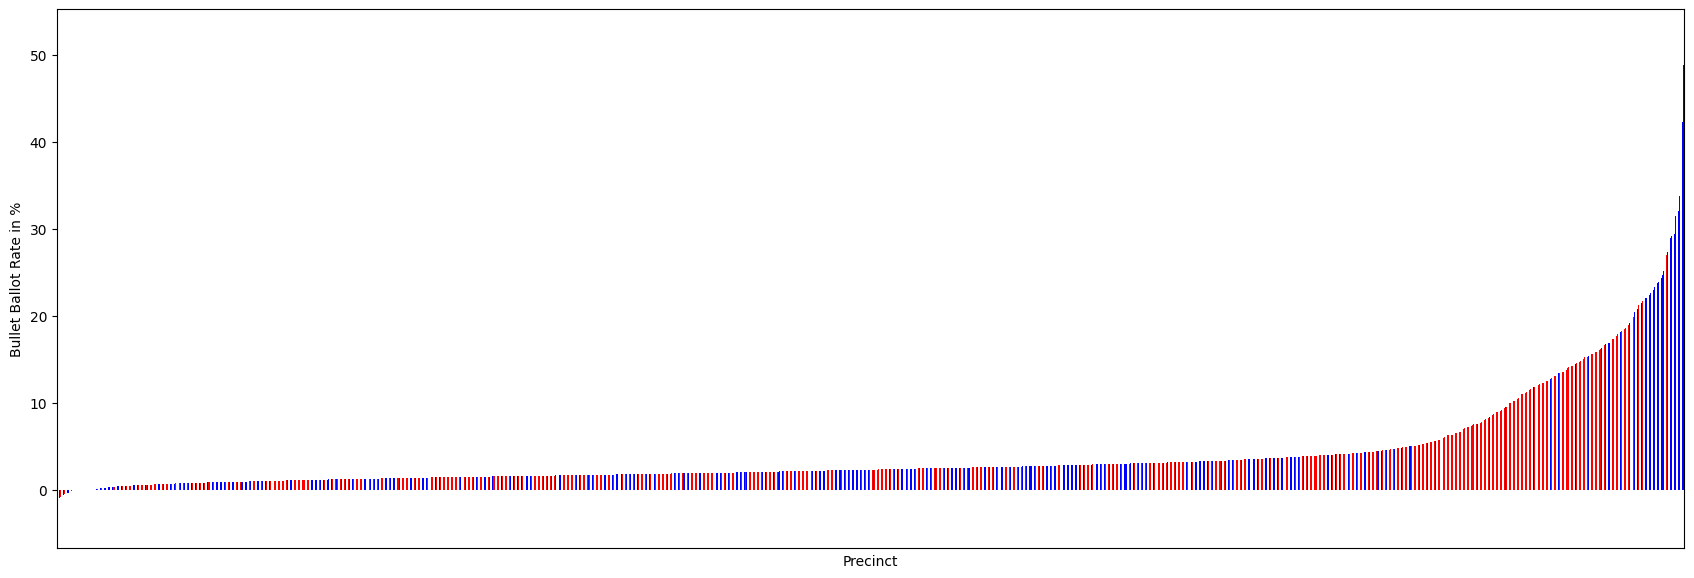

In [39]:

colored_total = colored_total.sort_values("Bullet Ballots %")
colored_total["Bullet Ballots %"].iloc[:].plot.bar(figsize=(21, 7), ylabel="Bullet Ballot Rate in %", color=colored_total["Color"], xlabel="Precinct", xticks=[])

<Axes: xlabel='County,Precinct,Choice', ylabel='Bullet Ballot Rate in %'>

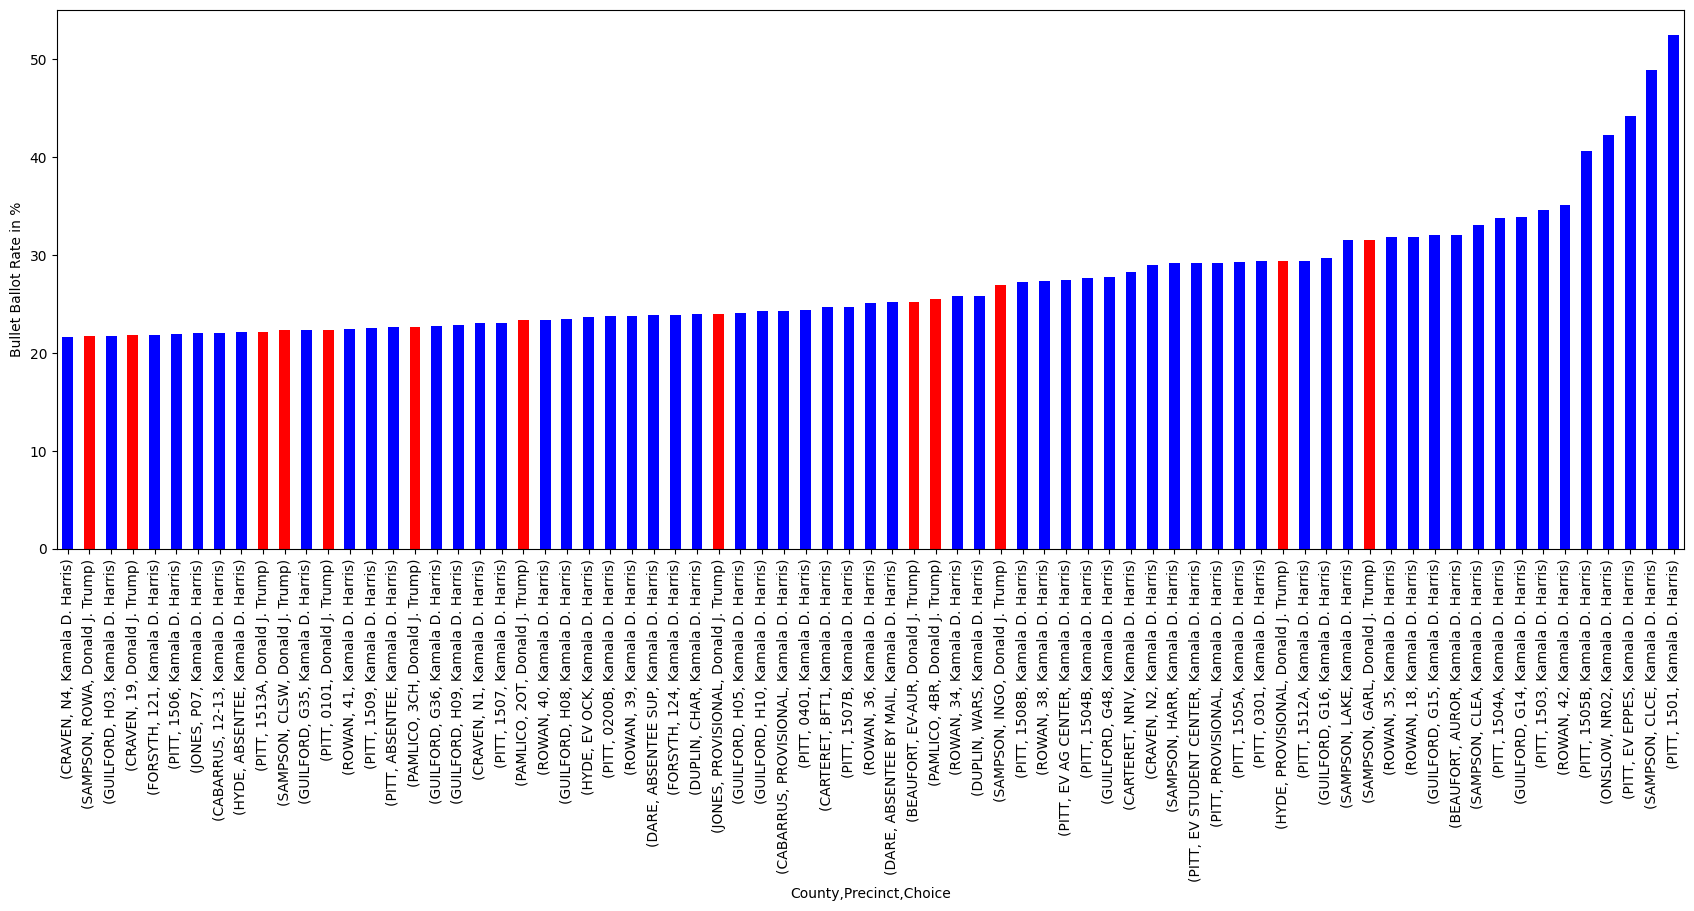

In [40]:
colored_total["Bullet Ballots %"].iloc[-75:].plot.bar(figsize=(21, 7), ylabel="Bullet Ballot Rate in %", color=colored_total["Color"].iloc[-75:])

In [41]:
colored_total["Color"]

County      Precinct     Choice          
AVERY       08           Donald J. Trump     r
EDGECOMBE   PROVISIONAL  Kamala D. Harris    b
WASHINGTON  P2           Kamala D. Harris    b
WAKE        01-29        Kamala D. Harris    b
GUILFORD    G18          Kamala D. Harris    b
                                            ..
PITT        1505B        Kamala D. Harris    b
ONSLOW      NR02         Kamala D. Harris    b
PITT        EV EPPES     Kamala D. Harris    b
SAMPSON     CLCE         Kamala D. Harris    b
PITT        1501         Kamala D. Harris    b
Name: Color, Length: 2861, dtype: object

In [42]:
df_winner.loc["SAMPSON"]

,,Election Date,Contest Group ID,Contest Type,Choice Party,Vote For,Election Day,Early Voting,Absentee by Mail,Provisional,Total Votes,Real Precinct,Unnamed: 15,Color
Precinct,Choice,,,,,,,,,,,,,
AUTR,Donald J. Trump,11/05/2024,1393,S,REP,1,387,652,22,2,1063,Y,NaN,r
CLCE,Kamala D. Harris,11/05/2024,1393,S,DEM,1,107,351,8,1,467,Y,NaN,b
CLEA,Kamala D. Harris,11/05/2024,1393,S,DEM,1,199,821,38,2,1060,Y,NaN,b
CLEM,Donald J. Trump,11/05/2024,1393,S,REP,1,341,565,24,2,932,Y,NaN,r
CLNE,Donald J. Trump,11/05/2024,1393,S,REP,1,125,821,18,1,965,Y,NaN,r
CLSW,Donald J. Trump,11/05/2024,1393,S,REP,1,121,550,37,1,709,Y,NaN,r
CLWE,Donald J. Trump,11/05/2024,1393,S,REP,1,135,706,28,4,873,Y,NaN,r
GARL,Donald J. Trump,11/05/2024,1393,S,REP,1,171,285,5,4,465,Y,NaN,r
GIDD,Donald J. Trump,11/05/2024,1393,S,REP,1,165,303,9,1,478,Y,NaN,r


<Axes: xlabel='County,Precinct,Choice', ylabel='Bullet Ballots'>

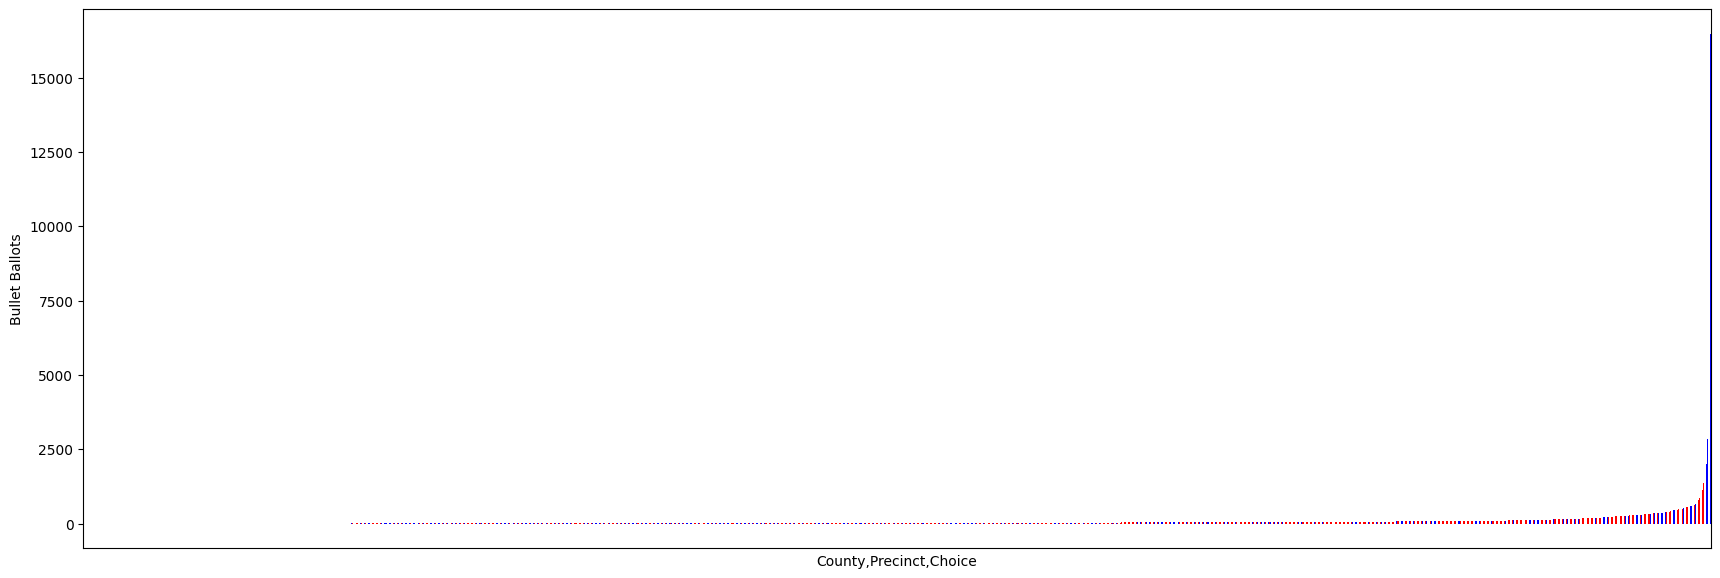

In [43]:
colored_total = colored_total.sort_values("Difference")
colored_total["Difference"].iloc[:].plot.bar(figsize=(21, 7), ylabel="Bullet Ballots", color=colored_total["Color"], xticks=[])

<Axes: xlabel='County,Precinct,Choice', ylabel='Bullet Ballots'>

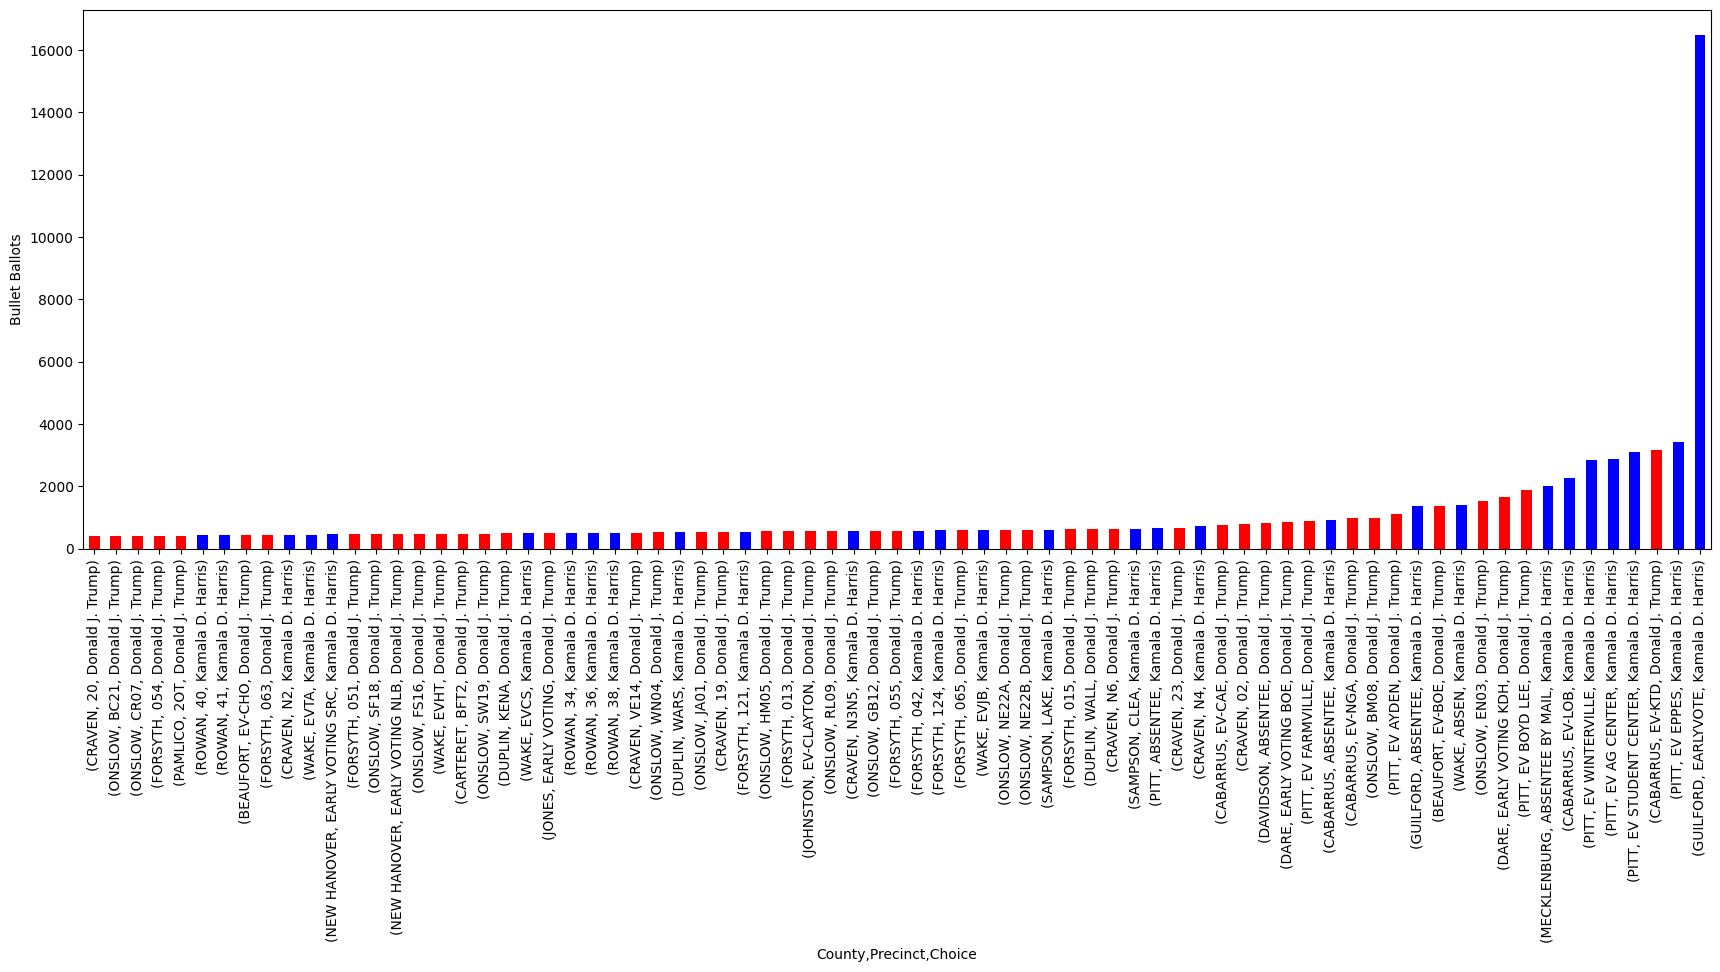

In [44]:
colored_total["Difference"].iloc[-75:].plot.bar(figsize=(21, 7), ylabel="Bullet Ballots", color=colored_total["Color"].iloc[-75:])

In [45]:
# colored_total.groupby(level=(0, 1)).sum()
colored_total.reset_index().groupby("Choice")[["Total Votes President", "Total Votes House", "Difference"]].sum()

,Total Votes President,Total Votes House,Difference
Choice,,,
Donald J. Trump,3105243,2985298,119945
Kamala D. Harris,2592658,2496876,95782
